In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('data_final.csv')

In [4]:
df

,text_clean,sentiment,sentiment_
0,surat rekom petinggi ganyantumin pangkat golong,0.000000,0
1,lupa terima total daftar,0.000000,0
2,kemarin isi yogyakarta domisili,0.000000,0
3,gim nih lupa correct beasiswa lupa kk solusi ap,0.000000,0
4,sedih masuk angkat,-33.333333,-1
...,...,...,...
1869,cerita inspiratif msib ngirit bbh turun,16.666667,1
1870,sekal masuk feed haha,0.000000,0
1871,waww,0.000000,0
1872,capernya,0.000000,0


# Frequensi Words

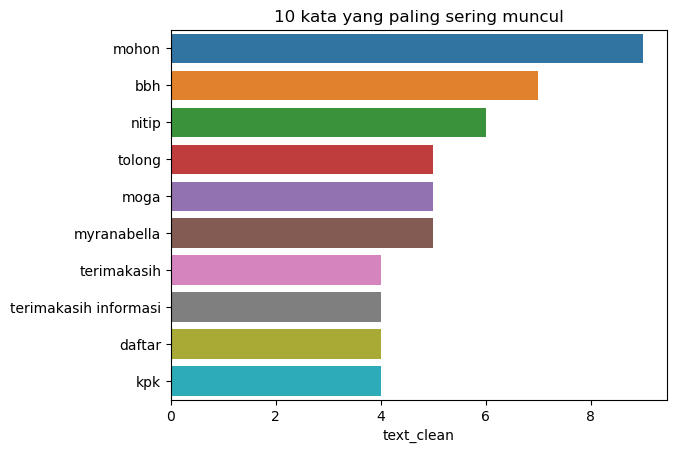

In [11]:
sns.barplot(y=df['text_clean'].value_counts()[:10].index,x=df['text_clean'].value_counts()[:10],
            orient='h')
plt.title('10 kata yang paling sering muncul')
plt.show()

# Word Clouds

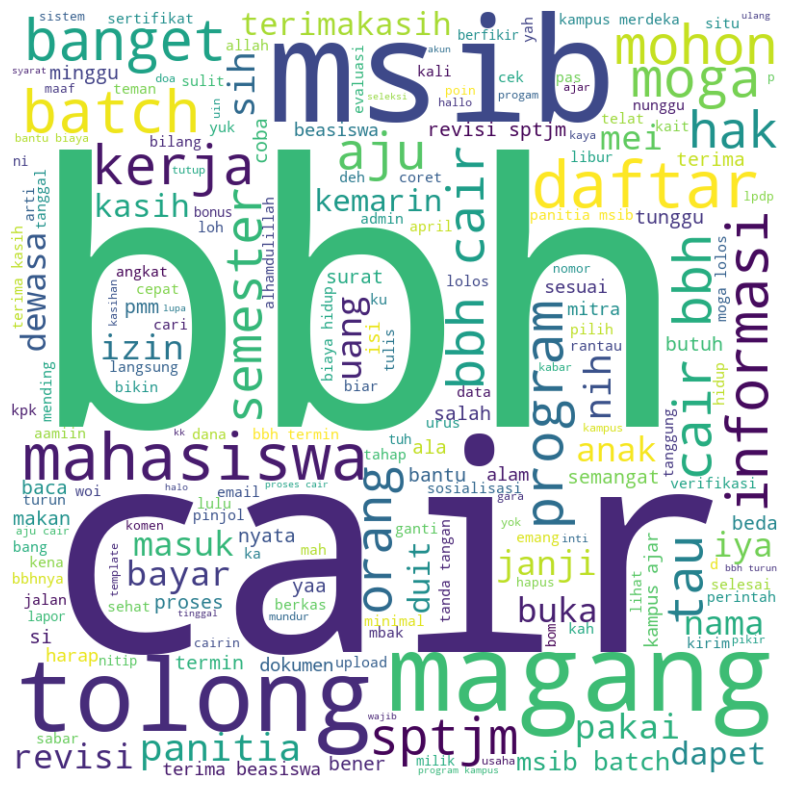

In [12]:
all_words = ' '.join([t for t in df['text_clean']])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Count Vectorizer (Mengubah data teks kedalam matriks)

In [30]:
sample = df['text_clean'][:5].values
vect = CountVectorizer().fit(sample)
X_vect = vect.transform(sample).toarray()
data_vect = pd.DataFrame(X_vect,columns=vect.get_feature_names_out())
data_vect

,angkat,ap,beasiswa,correct,daftar,domisili,ganyantumin,gim,golong,isi,...,nih,pangkat,petinggi,rekom,sedih,solusi,surat,terima,total,yogyakarta
0,0,0,0,0,0,0,1,0,1,0,...,0,1,1,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Jumlah Sentimen Pos, Net, dan Neg

In [17]:
pos  = len(df[df['sentiment_'] == 1])
neu = len(df[df['sentiment_']== 0])
neg = len(df[df['sentiment_']== -1])
print("positif\t: ",pos)
print("netral\t: ",neu)
print("negatif\t: ",neg)

positif	:  406
netral	:  1263
negatif	:  205


Analisis Sentimen :


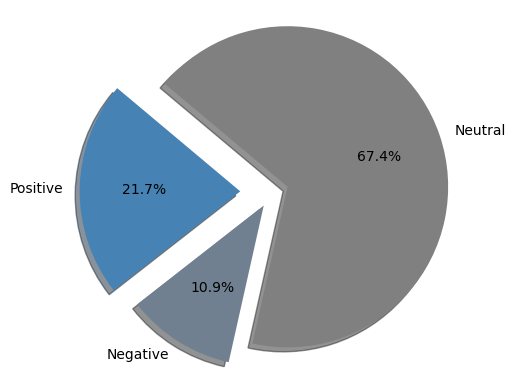

In [18]:
print('Analisis Sentimen :')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['steelblue', 'slategray', 'gray']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Perbandingan hasil akurasi Metode

In [19]:
report = pd.DataFrame({'metode':["naive bayes","SVM"],"akurasi":[90,95]})
report

,metode,akurasi
0,naive bayes,90
1,SVM,95


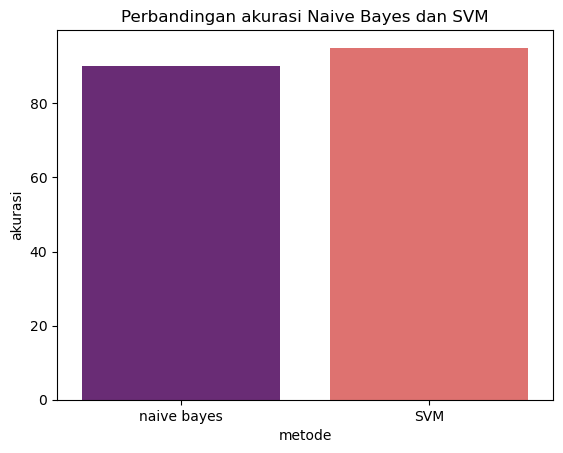

In [20]:
sns.barplot(x='metode',y='akurasi',data=report,palette = 'magma')
plt.title("Perbandingan akurasi Naive Bayes dan SVM")
plt.show()